In [23]:
import glob
import os

# get data file names
filenames = glob.glob(os.path.expanduser('~/Downloads/2023-*.csv'))

# create an empty list to store the data frames
dfs = []

for filename in filenames:
    df = pd.read_csv(filename)
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)
print(f'The data contains {len(data)} records.')

The data contains 16245 records.


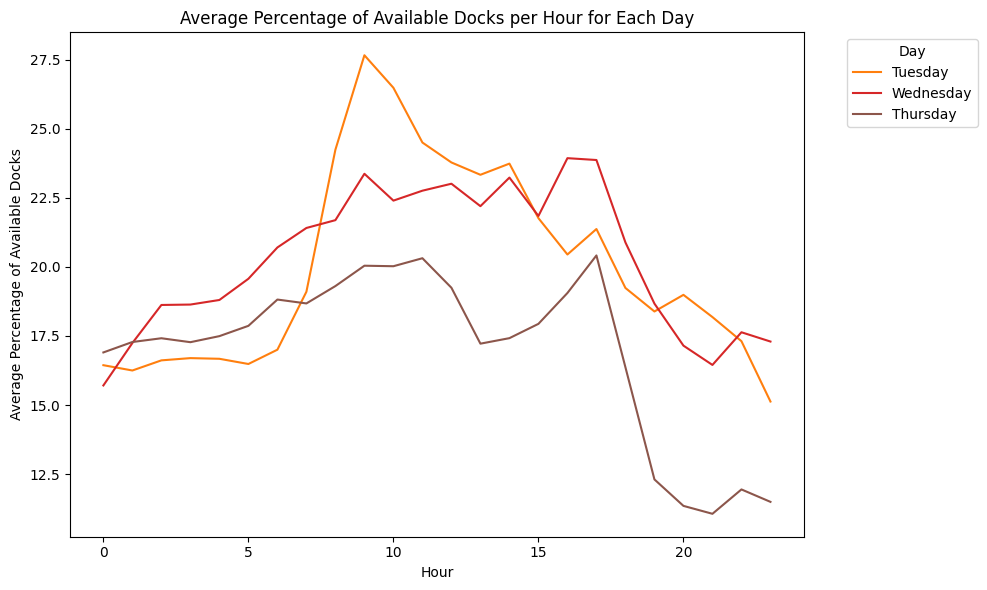

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the weekday and the hour from the 'TimeStamp' column
data['Day'] = data['TimeStamp'].dt.day_name()
data['Hour'] = data['TimeStamp'].dt.hour

# Calculate the total capacity for each timestamp
data['TotalCapacity'] = data['BikesDisabled'] + data['EBikesAvailable'] + data['BikesAvailable'] + data['DocksDisabled'] + data['DocksAvailable']

# Calculate the percentage of available docks for each timestamp
data['PercentageAvailable'] = (data['DocksAvailable'] / data['TotalCapacity']) * 100

# Group by the 'Day' and 'Hour' columns and calculate the average percentage of available docks
grouped_data = data.groupby(['Day', 'Hour'])['PercentageAvailable'].mean()

# Order of the days in the week for the plot
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a line plot for each day
plt.figure(figsize=(10, 6))
cmap = plt.get_cmap('tab10', len(days_order))

for i, day in enumerate(days_order):
    if day in grouped_data.index:
        day_data = grouped_data.loc[day]
        plt.plot(day_data.index, day_data.values, color=cmap(i), label=day)

plt.xlabel('Hour')
plt.ylabel('Average Percentage of Available Docks')
plt.title('Average Percentage of Available Docks per Hour for Each Day')
plt.legend(title='Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

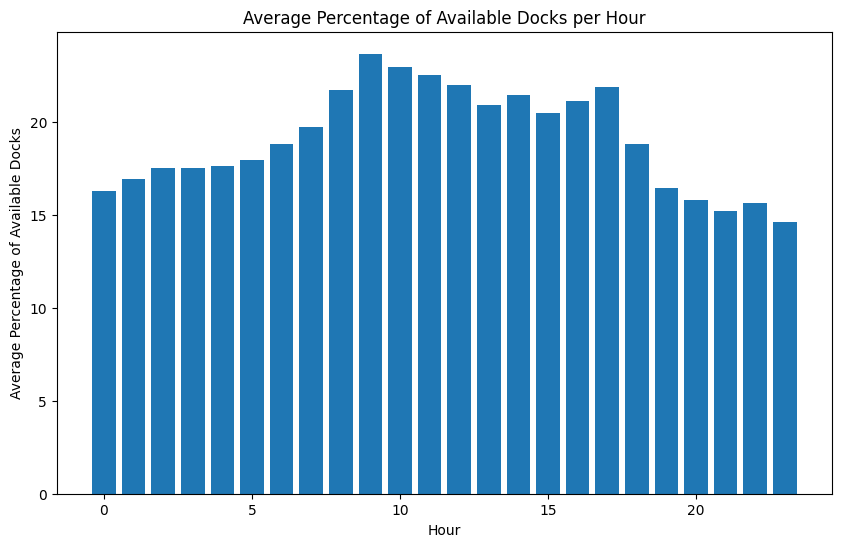

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the hour from the 'TimeStamp' column
data['Hour'] = data['TimeStamp'].dt.hour

# Calculate the total capacity for each timestamp
data['TotalCapacity'] = data['BikesDisabled'] + data['EBikesAvailable'] + data['BikesAvailable'] + data['DocksDisabled'] + data['DocksAvailable']

# Calculate the percentage of available docks for each timestamp
data['PercentageAvailable'] = (data['DocksAvailable'] / data['TotalCapacity']) * 100

# Group by the 'Hour' column and calculate the average percentage of available docks
grouped_data = data.groupby('Hour')['PercentageAvailable'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Hour')
plt.ylabel('Average Percentage of Available Docks')
plt.title('Average Percentage of Available Docks per Hour')
plt.show()

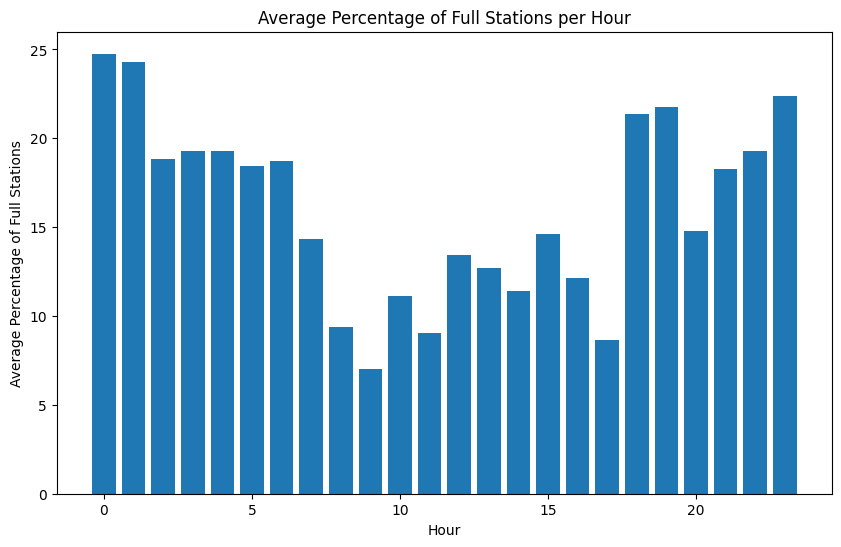

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the hour from the 'TimeStamp' column
data['Hour'] = data['TimeStamp'].dt.hour

data['ZeroDocks'] = (data['DocksAvailable'] == 0).astype(int)
data['NumberOfStations'] = 1

grouped_data = data.groupby('Hour').agg({
    'ZeroDocks': 'sum', 
    'NumberOfStations': 'sum', 
    'TimeStamp': 'nunique'
})


# Calculate the percentage of full stations per hour
grouped_data['PercentageFullStations'] = (grouped_data['ZeroDocks'] / grouped_data['NumberOfStations']) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['PercentageFullStations'])
plt.xlabel('Hour')
plt.ylabel('Average Percentage of Full Stations')
plt.title('Average Percentage of Full Stations per Hour')
plt.show()

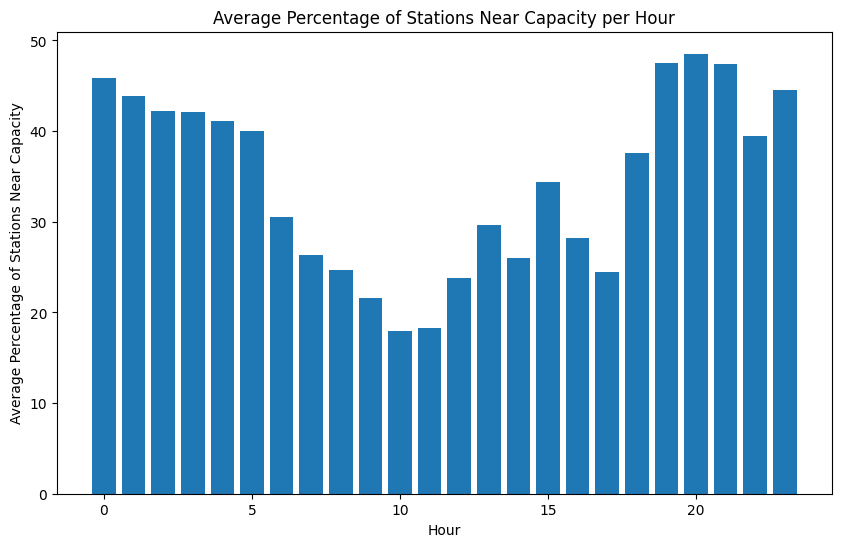

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the hour from the 'TimeStamp' column
data['Hour'] = data['TimeStamp'].dt.hour

data['ZeroDocks'] = (data['DocksAvailable'] < 2).astype(int)
data['NumberOfStations'] = 1

grouped_data = data.groupby('Hour').agg({
    'ZeroDocks': 'sum', 
    'NumberOfStations': 'sum', 
    'TimeStamp': 'nunique'
})


# Calculate the percentage of stations "near capacity" per hour
grouped_data['PercentageFullStations'] = (grouped_data['ZeroDocks'] / grouped_data['NumberOfStations']) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['PercentageFullStations'])
plt.xlabel('Hour')
plt.ylabel('Average Percentage of Stations Near Capacity')
plt.title('Average Percentage of Stations Near Capacity per Hour')
plt.show()

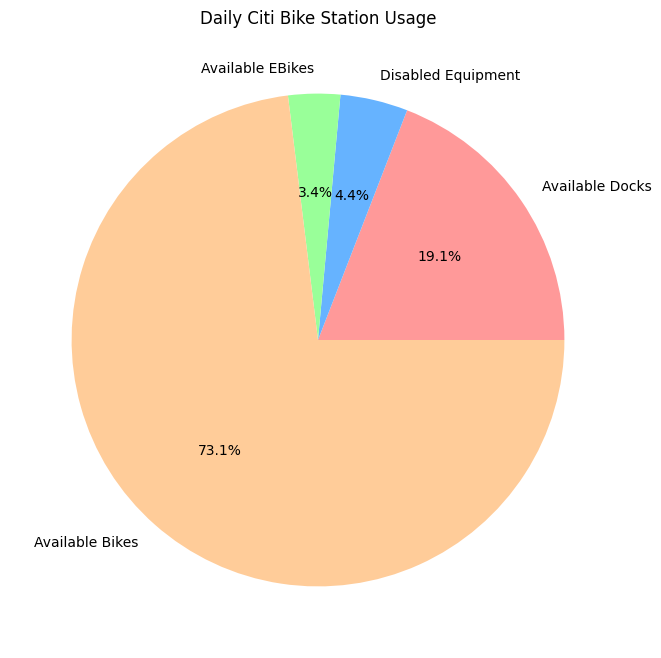

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('2023-07-25.csv')

# Calculate the total capacity for each timestamp
data['TotalCapacity'] = data['BikesDisabled'] + data['EBikesAvailable'] + data['BikesAvailable'] + data['DocksDisabled'] + data['DocksAvailable']

# Calculate the percentage of available docks for each timestamp
data['PercentageAvailable'] = (data['DocksAvailable'] / data['TotalCapacity']) * 100

# Calculate the average percentage of available docks
average_percentage_available = data['PercentageAvailable'].mean()

# Calculate the average percentage of each category
average_percentage_disabled = (data['DocksDisabled'].sum() + data['BikesDisabled'].sum()) / data['TotalCapacity'].sum() * 100
average_percentage_ebikes_available = (data['EBikesAvailable'].sum() / data['TotalCapacity'].sum()) * 100
average_percentage_bikes_available = (data['BikesAvailable'].sum() / data['TotalCapacity'].sum()) * 100

# Define the data for the pie chart
sizes = [average_percentage_available, average_percentage_disabled, average_percentage_ebikes_available, average_percentage_bikes_available]
labels = ['Available Docks', 'Disabled Equipment', 'Available EBikes', 'Available Bikes']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Daily Citi Bike Station Usage')
plt.show()

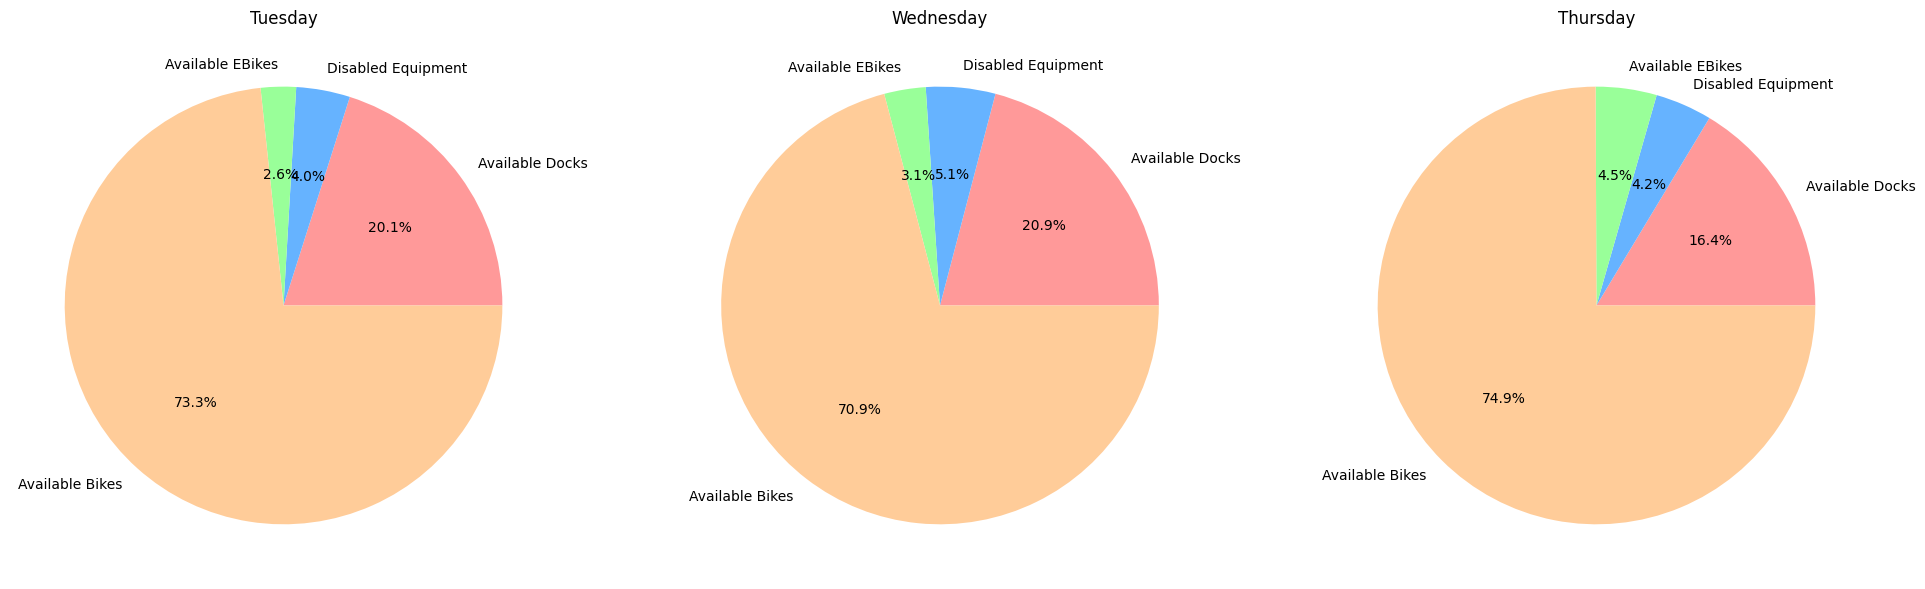

In [28]:
# Load the data
try:
    data
except NameError:
    data = pd.read_csv('2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the day of the week from the 'TimeStamp' column
data['DayOfWeek'] = data['TimeStamp'].dt.day_name()

# Group the data by day of the week
grouped_data = data.groupby('DayOfWeek')

# Get the list of unique days to set up the subplots
unique_days = data['DayOfWeek'].unique()

# Create the subplots
fig, axs = plt.subplots(1, len(unique_days), figsize=(8*len(unique_days), 8))

for i, day in enumerate(unique_days):
    group = grouped_data.get_group(day).copy()  # make a copy of the group

    # Calculate the total capacity for each timestamp
    group['TotalCapacity'] = group['BikesDisabled'] + group['EBikesAvailable'] + group['BikesAvailable'] + group['DocksDisabled'] + group['DocksAvailable']

    # Calculate the average percentage of each category
    average_percentage_disabled = (group['DocksDisabled'].sum() + group['BikesDisabled'].sum()) / group['TotalCapacity'].sum() * 100
    average_percentage_ebikes_available = (group['EBikesAvailable'].sum() / group['TotalCapacity'].sum()) * 100
    average_percentage_bikes_available = (group['BikesAvailable'].sum() / group['TotalCapacity'].sum()) * 100
    average_percentage_docks_available = (group['DocksAvailable'].sum() / group['TotalCapacity'].sum()) * 100

    # Define the data for the pie chart
    sizes = [average_percentage_docks_available, average_percentage_disabled, average_percentage_ebikes_available, average_percentage_bikes_available]
    labels = ['Available Docks', 'Disabled Equipment', 'Available EBikes', 'Available Bikes']
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

    # Create a pie chart
    axs[i].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
    axs[i].set_title(f'{day}')

plt.show()


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the hour from the 'TimeStamp' column
data['Hour'] = data['TimeStamp'].dt.hour

# Calculate the total number of usable docks for each timestamp
data['UsableDocks'] = data['DocksAvailable'] - data['DocksDisabled']

# Group by the 'Name' column and calculate the average number of usable docks
grouped_data = data.groupby('Name')['UsableDocks'].mean()

# Sort the data in ascending order to get the stations with the lowest number of available docks
sorted_data = grouped_data.sort_values()

# Convert the sorted data to a DataFrame
result = pd.DataFrame(sorted_data).reset_index()

# Rename the columns
result.columns = ['Station', 'Average Available Docks']

# Convert the sorted data to a DataFrame and remove the index
result = pd.DataFrame(sorted_data).reset_index()
result.index += 1

# Rename the columns
result.columns = ['Station', 'Average Available Docks']

# Display the result
print('Stations with the Least Available Docks')
print('-'*50)
print(result.to_string(index=False))

Stations with the Least Available Docks
--------------------------------------------------
                   Station  Average Available Docks
    Clinton St & Centre St                 0.745029
         Henry St & W 9 St                 1.357895
   Dwight St & Van Dyke St                 1.472515
         Bay St & Court St                 1.669006
Sigourney St & Columbia St                 1.760234
         Henry St & Bay St                 1.995322
 Pioneer St & Van Brunt St                 2.280702
Commerce St & Van Brunt St                 2.287719
      Columbia St & W 9 St                 2.345029
   Columbia St & Degraw St                 3.442105
    Wolcott St & Dwight St                 3.457310
  Carroll St & Columbia St                 3.939181
    Coffey St & Conover St                 4.313450
 Van Brunt St & Wolcott St                 5.177778
Van Brunt St & Van Dyke St                 6.080702
  Richards St & Delavan St                 9.642105
     Coffey St & Ferris S